In [128]:
# Pandas untuk manipulasi data
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Membuang kolom - kolom yang tidak relevan terhadap analisis
custData = pd.read_csv("bank.csv").drop(["RowNumber", "CustomerId", "Surname"], 1)

# 1 = yes, 0 = no

# Business Problem

Bank Purwad baru berdiri sekitar 7 tahun silam. Namun, kiprahnya selama ini tidak bisa dipandang sebelah mata dalam ruang kompetisi bank daerah.

Selama ini kita berhasil menghimpun total 10.000 nasabah baru. Pencapaian ini melampaui prestasi Bank Hacktiv (6.300), Bank Algo (8.400), dan Bank DQLab (9.700). Kemenangan ini patut kita syukuri dan apresiasi. Penghargaan tertinggi sudah selayaknya kita berikan pada Tim Sales dan Tim Marketing karena kinerjanya yang sudah sangat optimal. Namun begitu, kami (Tim Data Science) menemukan sebuah kemunduran yang cukup mengkhawatirkan.

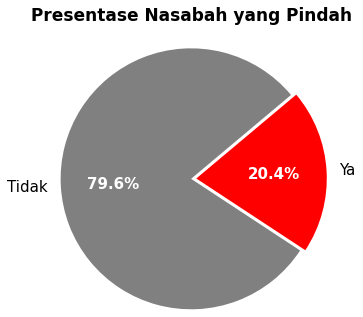

In [118]:
# Parameter'textprops' berdampak pada presentase serta label.
# Maka itu, subplots harus digunakan untuk dapat memberi warna, ukuran, dan style yang berbeda terhadap keduanya. 

fig, pie = plt.subplots()
percentage, label, chart = pie.pie(
        custData.groupby("Exited").count()["CreditScore"], explode = (.01, .05),
        labels = ["Tidak", "Ya"], autopct = "%1.1f%%", startangle = 40,
        colors = ["grey", "red"], textprops = {"size" : 15,"color" : "black"},
        radius = 1.5)

plt.setp(chart, **{"color" : "white", "weight" :"bold", "fontsize" : 15})
plt.title("Presentase Nasabah yang Pindah", fontdict = {'fontsize': 17,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.2)

plt.show()

Kami menemukan bahwa dari total seluruh nasabah terdaftar, ada sekitar 20.4% nasabah yang akhirnya memutuskan untuk pindah. Angka ini tentu bukan angka yang kecil karena hampir menyentuh seperempat total nasabah. Berdasar info dari tim Relationship Officer (RO), 63% diantaranya pindah ke Bank Hacktiv, 29% pindah ke Bank Algo, dan 8% sisanya tidak diketahui. Permasalahan ini harus segera diselesaikan mengingat pemerintah pada pertengahan tahun depan akan menyerahkan insentif sebesar 100 Milyar Rupiah kepada 2 bank daerah dengan jumlah nasabah tertinggi. Jika manajemen nasabah seperti ini dibiarkan, kami khawatir jumlah nasabah akan terus tergerus hingga tahun depan.

# Tujuan EDA

Tujuan dari laporan dan analisis ini tidak lain adalah untuk mendukung dan mendorong tim RO untuk memperbaiki sistem manajemen nasabah. Adapun bentuk dukungan tersebut secara teknis akan terwujud dalam kategorisasi nasabah yang memiliki kecenderungan untuk pindah. Nantinya, dengan 'peramalan' ini, diharapkan tim RO dapat dengan sigap menghubungi, memperbaiki hubungan, menawarkan kemudahan, ataupun mencari solusi terhadap permasalahan yang mungkin seorang nasabah hadapi terhadap Bank Purwad. Dengan begitu, angka penurunan jumlah nasabah bisa kita tekan atau bahkan hentikan setidaknya sampai pemerintah memberikan insentif. 

# Mengecek dan menangani *missing values* serta *outliers*

In [124]:
# Tidak ditemukan data NULL
print("Jumlah data NULL : ", len(custData[custData.isnull().any(axis = 1)]), "baris")

Jumlah data NULL :  0 baris


In [180]:
print("Korelasi antar kolom :")
display(custData.corr())

Korelasi antar kolom :


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Sampai di sini, korelasi terkuat terhadap variabe ***Exited*** adalah ***Age***, ***Balance***, dan ***IsActiveMember***.
Namun, sebelum melangkah lebih jauh, variabel - variabel tersebut harus dilihat distribusinya terlebih dahulu.

'Age' memiliki distribusi 'right skewed'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.


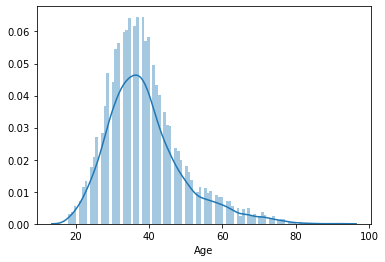

Nilai korelasi 'Age' dan 'Exited' :


,Age,Exited
Age,1.000000,0.323968
Exited,0.323968,1.000000


In [186]:
print("'Age' memiliki distribusi 'right skewed'. Oleh karena itu, untuk menilai korelasinya harus menggunakan metode Spearman.")
sns.distplot(custData["Age"], kde = True, bins = 100)
plt.show()

print("Nilai korelasi 'Age' dan 'Exited' :")
display(custData[["Age", "Exited"]].corr(method = "spearman"))

Korelasi ini bernilai positif yang berarti semakin tua seorang nasabah, maka semakin besar kecenderungannya untuk keluar dari Bank Purwad.

In [199]:
custData["Age"].min()

18

In [201]:
for x in range(custData["Age"].min(), custData["Age"].max() + 1, 10):
    print(x)

18
28
38
48
58
68
78
88


In [207]:
custData["Age"].isnull().values.any()

False

In [209]:
ageRange, ar = [], range(custData["Age"].min(), custData["Age"].max() + 1, 10)

for a in custData["Age"]:
    for i, r in enumerate(ar):
        try:
            if r < a <= ar[i + 1]:
                ageRange.append(f"{r} - {ar[i + 1]}")
                break
        except:
            ageRange.append(f"> {r}")
                
custData["ageRange"] = ageRange

ValueError: Length of values does not match length of index

In [196]:
custData[custData["Exited"] == 1].groupby("Age").count().sort_values("CreditScore", ascending = False)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,,,
46,91,91,91,91,91,91,91,91,91,91
40,89,89,89,89,89,89,89,89,89,89
43,88,88,88,88,88,88,88,88,88,88
45,87,87,87,87,87,87,87,87,87,87
48,80,80,80,80,80,80,80,80,80,80
42,77,77,77,77,77,77,77,77,77,77
47,77,77,77,77,77,77,77,77,77,77
49,75,75,75,75,75,75,75,75,75,75
44,73,73,73,73,73,73,73,73,73,73


In [136]:
custData.describe()
print("Statistik data :")
display(custData.describe())

print("Dapat disimpulkan bahwa ")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


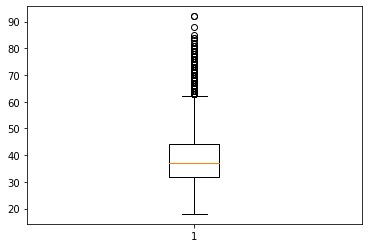

In [165]:
plt.boxplot(custData["Age"])
plt.show()

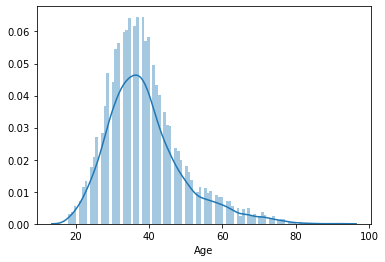

In [166]:
sns.distplot(custData["Age"], kde = True, bins = 100)
plt.show()

# Mohon maaf sebesar2nya, saya tidak bisa menyelesaikan analisis ini karena waktu yang disediakan sangat kurang menurut saya. Berikut rencana analisis yang sekiranya akan saya lakukan:

- Membuat rentan usia agar bisa di plot sebagai kategori terhadap "exited". Hal ini dilakukan agar visualisasi lebih dapat berbicara dan mudah dilihat.
- Mengecek distribusi data dan handling outliers pada "balance" dan "isactivemember" jika ada.
- Plotting korelasi multivariate antara "age", "exited", dan "balance"/"isactivemember" untuk memperkuat analisis.

Itu sekiranya yang sampai akhir ini saya rencanakan. Terima kasih banyak.